In [1]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from matplotlib.lines import Line2D

plt.rc('figure', facecolor='w')

In [2]:
def read_sd(filename):
    return np.loadtxt(filename).T

def plot_sd_single(ax, filename, color, label):
    x, y = read_sd(filename)
    ax.plot(x, y, color=color, label=label)
    
def get_lambda(x, y):
    dx = x[1]-x[0]
    return np.sum(y[80:]/x[80:])*dx

def plot_sd(ax, qm, mm, ml):
    plot_sd_single(ax, qm, '#33a02c', '$\omega$B97X')
    plot_sd_single(ax, mm, '#e31a1c', 'MM')
    plot_sd_single(ax, ml, '#1f77b4', 'ANI-2x')

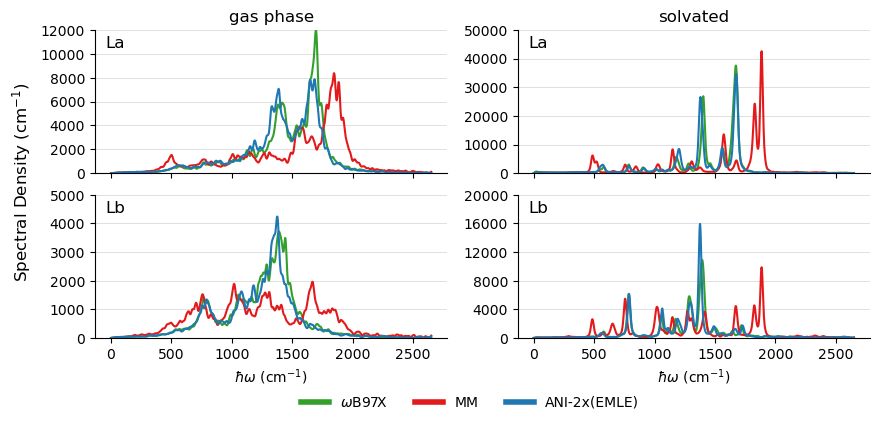

In [3]:
filenames_dict = {
    'La': {
        'gas phase': [
            'wB97X/wB97X_gas_La_SD.dat',
            'wB97X/MM_gas_La_SD.dat',
            'wB97X/ANI-2x_gas_La_SD.dat',
        ],
        'solvated': [
            'wB97X/wB97X_ElEmb_La_SD.dat',
            'wB97X/MM_MM_La_SD.dat',
            'wB97X/ANI-2x_EMLE_La_SD.dat',
        ]
    },
    'Lb': {
        'gas phase': [
            'wB97X/wB97X_gas_Lb_SD.dat',
            'wB97X/MM_gas_Lb_SD.dat',
            'wB97X/ANI-2x_gas_Lb_SD.dat',
        ],
        'solvated': [
            'wB97X/wB97X_ElEmb_Lb_SD.dat',
            'wB97X/MM_MM_Lb_SD.dat',
            'wB97X/ANI-2x_EMLE_Lb_SD.dat',
        ]      
    }
}

states = ['La', 'Lb']
systems = ['gas phase', 'solvated']

fig, axs = plt.subplots(2, 2, figsize=(10, 4), sharex=True)
fig.subplots_adjust(hspace=0.15)

ranges = [(0, 12000), (0, 50000), (0, 5000), (0, 20000)]

yticks = [np.arange(0, 13000, 2000),
          np.arange(0, 51000, 10000),
          np.arange(0,  5500, 1000),
          np.arange(0, 21000, 4000)]

for (state, system), (i, ax) in zip(product(states, systems), enumerate(axs.flatten())):
    plot_sd(ax, *filenames_dict[state][system])
    ax.patch.set_alpha(0.)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(*ranges[i])
    ax.set_yticks(yticks[i])
    for ytick in yticks[i]:
        ax.axhline(ytick, linewidth=0.5, color='lightgrey', zorder=0)
    if i in [2, 3]:
        ax.set_xlabel('$\hbar \omega$ (cm$^{-1}$)')
    else:
        ax.set_title(system)
    trans = mtransforms.ScaledTranslation(10/72, -2/72, fig.dpi_scale_trans)
    ax.text(-0.01, 0.98, state, transform=ax.transAxes + trans,
            verticalalignment='top', fontsize='large')
    
custom_lines = [Line2D([0], [0], color='#33a02c', lw=4),
                Line2D([0], [0], color='#e31a1c', lw=4),
                Line2D([0], [0], color='#1f77b4', lw=4)]
plt.figlegend(custom_lines, 
              ['$\omega$B97X', 'MM', 'ANI-2x(EMLE)'], 
              loc='lower center', 
              ncol=3,
              bbox_to_anchor=(0.5, -0.1),
              frameon=False)
    
fig.text(0.04, 0.5, 'Spectral Density (cm$^{-1}$)', va='center', rotation='vertical', fontsize='large')
fig.savefig('Fig3.png', dpi=300, bbox_inches='tight')
plt.show()